In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import mne
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import sys; sys.path.insert(0, '../')
from esinet import util
from esinet import Simulation
from esinet import Net
from esinet.forward import create_forward_model, get_info
plot_params = dict(surface='white', hemi='both', verbose=0)


Get Forward model

In [2]:
info = get_info()
info['sfreq'] = 100
fwd = create_forward_model(info=info)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    1.1s remaining:    2.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    1.2s remaining:    0.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


In [4]:
n_samples = 10000
settings = dict(number_of_sources=(1, 10), extents=(15, 25), duration_of_trial=0.1)
sim = Simulation(fwd, info, settings=settings).simulate(n_samples=n_samples)


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [13]:
net_sets = dict(verbose=1, activation_function='swish', n_layers=1, n_lstm_units=50)
net = Net(fwd, **net_sets).fit(sim, dropout=0.0)

Model: "net_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 10, 50)            22400     
_________________________________________________________________
flatten_5 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 12840)             6432840   
_________________________________________________________________
reshape_5 (Reshape)          (None, 10, 1284)          0         
_________________________________________________________________
activation_5 (Activation)    (None, 10, 1284)          0         
Total params: 6,455,240
Trainable params: 6,455,240
Non-trainable params: 0
_________________________________________________________________


### Evaluate

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

predicting temporal in 1 go
(1, 1284, 10)
predicted_sources min: -0.017243457958102226,predicted_sources max: 0.012729370966553688
rescaled: predicted_sources min: -0.0010784439509734511,predicted_sources max: 0.0006850875215604901


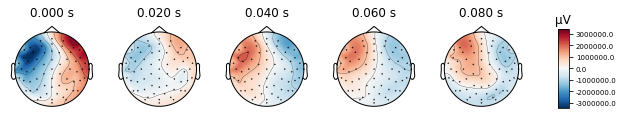

  File "C:\Users\lukas\virtualenvs\esienv\lib\site-packages\mne\viz\_brain\_brain.py", line 1348, in _on_button_release
    self.picked_renderer = self.plotter.iren.FindPokedRenderer(x, y)
AttributeError: 'RenderWindowInteractor' object has no attribute 'FindPokedRenderer'


Using control points [0.00031636 0.00034769 0.0005936 ]
Using control points [0.0000000e+00 0.0000000e+00 4.8550309e-10]


  File "C:\Users\lukas\virtualenvs\esienv\lib\site-packages\mne\viz\_brain\_brain.py", line 1348, in _on_button_release
    self.picked_renderer = self.plotter.iren.FindPokedRenderer(x, y)
AttributeError: 'RenderWindowInteractor' object has no attribute 'FindPokedRenderer'


Using control points [0.00037599 0.00041261 0.00082792]


  File "C:\Users\lukas\virtualenvs\esienv\lib\site-packages\mne\viz\_brain\_brain.py", line 1348, in _on_button_release
    self.picked_renderer = self.plotter.iren.FindPokedRenderer(x, y)
AttributeError: 'RenderWindowInteractor' object has no attribute 'FindPokedRenderer'


Using control points [0.00000000e+00 0.00000000e+00 4.18912863e-09]
Using control points [0.00000000e+00 0.00000000e+00 7.26075169e-09]


  File "C:\Users\lukas\virtualenvs\esienv\lib\site-packages\mne\viz\_brain\_brain.py", line 1348, in _on_button_release
    self.picked_renderer = self.plotter.iren.FindPokedRenderer(x, y)
AttributeError: 'RenderWindowInteractor' object has no attribute 'FindPokedRenderer'


Using control points [0.00000000e+00 0.00000000e+00 7.26075169e-09]


  File "C:\Users\lukas\virtualenvs\esienv\lib\site-packages\mne\viz\_brain\_brain.py", line 1348, in _on_button_release
    self.picked_renderer = self.plotter.iren.FindPokedRenderer(x, y)
AttributeError: 'RenderWindowInteractor' object has no attribute 'FindPokedRenderer'


Using control points [0.000167   0.00017985 0.00028742]
Using control points [0.00015654 0.00017159 0.00023612]
Using control points [0.00015654 0.00017159 0.00023612]
Using control points [0.00022228 0.00024357 0.0003829 ]
Using control points [0.00022228 0.00024357 0.0003829 ]
Using control points [0.00036021 0.0003915  0.00061346]


In [7]:
%matplotlib qt
# Simulate new data
sim_test = Simulation(fwd, info, settings=settings).simulate(1)
idx = 0
# Predict sources
prediction = net.predict(sim_test)

# Plot Ground Truth
sim_test.source_data[0].plot(**plot_params)
# Plot simulated EEG
evoked = sim_test.eeg_data[idx].average()
evoked.plot()
evoked.plot_topomap([0.0, 0.02, 0.04, 0.06, 0.08])

# Plot predicted source
prediction.plot(**plot_params)
# Plot predicted EEG
evoked = util.get_eeg_from_source(prediction, fwd, info, tmin=0.)
evoked.plot()
evoked.plot_topomap([0.0, 0.02, 0.04, 0.06, 0.08])

In [ ]:
# Test if old net still works
settings_old = dict(number_of_sources=(1, 10), extents=(15, 25))
sim_old = Simulation(fwd, info, settings=settings_old).simulate(n_samples=5000)
net = Net(fwd).fit(sim_old)
net.predict(sim_old).plot(**plot_params)
sim_old.source_data.plot(**plot_params)
